<a href="https://colab.research.google.com/github/otakumesi/python-machine-learning-programming/blob/master/python_machine_learning_programming_part_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

print(tf.__version__)

1.13.1


In [4]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=None, name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    z = w * x + b
    init = tf.global_variables_initializer()

with tf.Session(graph=g) as sess:
    sess.run(init)
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f ---> z=%4.1f' % (t, sess.run(z, feed_dict={x: t})))

Instructions for updating:
Colocations handled automatically by placer.
x= 1.0 ---> z= 2.7
x= 0.6 ---> z= 1.9
x=-1.8 ---> z=-2.9


In [5]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=[None, 2, 3], name='input_x')
    x2 = tf.reshape(x, shape=(-1, 6), name='x2')
    
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')
    
with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    print('input shape: ', x_array.shape)
    print('Reshaped: \n', sess.run(x2, feed_dict={x: x_array}))
    print('Column Sums: \n', sess.run(xsum, feed_dict={x: x_array}))
    print('Column Means: \n', sess.run(xmean, feed_dict={x: x_array}))

input shape:  (3, 2, 3)
Reshaped: 
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums: 
 [18. 21. 24. 27. 30. 33.]
Column Means: 
 [ 6.  7.  8.  9. 10. 11.]


In [0]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

In [0]:
import tensorflow as tf

class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.1, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate=learning_rate
        self.g = tf.Graph()
        
        with self.g.as_default():
            tf.set_random_seed(random_seed)
            self.build()
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32, shape=(None, self.x_dim), name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, shape=(None), name='y_input')
        
        print(self.X)
        print(self.y)
        
        w = tf.Variable(tf.zeros(shape=(1)), name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), name='bias')
        print(w)
        print(b)
        
        self.z_net = tf.squeeze(w * self.X + b, name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors, name='sqr_means')
        
        optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=self.learning_rate,
            name='GradientDescent'
        )
        self.optimizer = optimizer.minimize(self.mean_cost)

In [8]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)
Instructions for updating:
Use tf.cast instead.


In [0]:
def train_linarg(sess, model, X_train, y_train, num_epochs=10):
    sess.run(model.init_op)
    
    training_costs = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y: y_train})
        training_costs.append(cost)
        
    return training_costs

In [0]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linarg(sess, lrmodel, X_train, y_train)

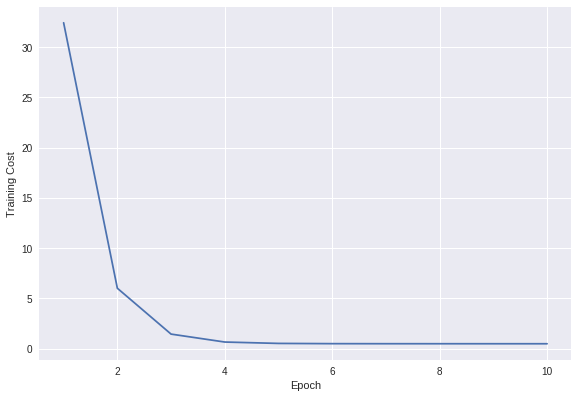

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

In [12]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2019-03-09 13:13:56--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  11.5MB/s    in 0.8s    

2019-03-09 13:13:57 (11.5 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2019-03-09 13:13:59--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0.08s   

2019-03-09 13:14:00 (342 KB/s) - ‘train-labels-id

In [0]:
!gzip *ubyte.gz -d

In [14]:
!ls

sample_data		t10k-labels-idx1-ubyte	 train-labels-idx1-ubyte
t10k-images-idx3-ubyte	train-images-idx3-ubyte


In [0]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,  '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,  '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack(">II", lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
        
    return images,  labels

In [16]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [17]:
mean_vals = np.mean(X_train, axis=0)
std_vals = np.std(X_train)
X_train_centered = (X_train - mean_vals) / std_vals
X_test_centered = (X_test - mean_vals) / std_vals

del X_train, X_test
print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [19]:
import tensorflow as tf
n_features = X_train_centered.shape[1]
n_classes = 10
random_seed = 123
np.random.seed(random_seed)

g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    tf_x = tf.placeholder(dtype=tf.float32, shape=(None, n_features), name='tf_x')
    tf_y = tf.placeholder(dtype=tf.int32, shape=None, name='tf_y')
    y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
    
    h1 = tf.layers.dense(inputs=tf_x, units=50, activation=tf.tanh, name='layer1')
    h2 = tf.layers.dense(inputs=h1, units=50, activation=tf.tanh, name='layer2')
    logits = tf.layers.dense(inputs=h2, units=10, activation=None, name='layer3')
    
    predictions = {
        'classes': tf.argmax(logits, axis=1, name='predicted_classes'),
        'probabilities': tf.nn.softmax(logits, name='softmax_tensor')
    }

Instructions for updating:
Use keras.layers.dense instead.


In [20]:
with g.as_default():
    cost = tf.losses.softmax_cross_entropy(onehot_labels=y_onehot, logits=logits)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(loss=cost)
    init_op = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


In [0]:
def create_batch_generator(X, y, batch_size=128, shuffle=False):
    X_copy = np.array(X)
    y_copy = np.array(y)
    
    if shuffle:
        data = np.column_stack((X_copy, y_copy))
        np.random.shuffle(data)
        X_copy = data[:, :-1]
        y_copy = data[:, -1].astype(int)
        
    for i in range(0, X.shape[0], batch_size):
        yield (X_copy[i:i+batch_size, :], y_copy[i:i+batch_size])

In [22]:
sess = tf.Session(graph=g)
sess.run(init_op)

training_costs = []
for epoch in range(50):
    training_loss = []
    batch_generator = create_batch_generator(X_train_centered, y_train, batch_size=64)
    for batch_X, batch_y in batch_generator:
        feed = {tf_x:batch_X, tf_y:batch_y}
        _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
        training_costs.append(batch_cost)
        
    print(' -- Epoch %2d Avg. Training Loss: %.4f' % (epoch + 1, np.mean(training_costs)))

 -- Epoch  1 Avg. Training Loss: 1.5573
 -- Epoch  2 Avg. Training Loss: 1.2532
 -- Epoch  3 Avg. Training Loss: 1.0854
 -- Epoch  4 Avg. Training Loss: 0.9738
 -- Epoch  5 Avg. Training Loss: 0.8924
 -- Epoch  6 Avg. Training Loss: 0.8296
 -- Epoch  7 Avg. Training Loss: 0.7794
 -- Epoch  8 Avg. Training Loss: 0.7381
 -- Epoch  9 Avg. Training Loss: 0.7032
 -- Epoch 10 Avg. Training Loss: 0.6734
 -- Epoch 11 Avg. Training Loss: 0.6475
 -- Epoch 12 Avg. Training Loss: 0.6247
 -- Epoch 13 Avg. Training Loss: 0.6045
 -- Epoch 14 Avg. Training Loss: 0.5864
 -- Epoch 15 Avg. Training Loss: 0.5700
 -- Epoch 16 Avg. Training Loss: 0.5551
 -- Epoch 17 Avg. Training Loss: 0.5415
 -- Epoch 18 Avg. Training Loss: 0.5290
 -- Epoch 19 Avg. Training Loss: 0.5175
 -- Epoch 20 Avg. Training Loss: 0.5068
 -- Epoch 21 Avg. Training Loss: 0.4968
 -- Epoch 22 Avg. Training Loss: 0.4875
 -- Epoch 23 Avg. Training Loss: 0.4788
 -- Epoch 24 Avg. Training Loss: 0.4706
 -- Epoch 25 Avg. Training Loss: 0.4629


In [23]:
feed = {tf_x: X_test_centered}
y_pred = sess.run(predictions['classes'], feed_dict=feed)

print('Test Accuracy: %.2f%%' % (100 * np.sum(y_pred == y_test) / y_test.shape[0]))

Test Accuracy: 93.89%


In [24]:
X_train, y_train = load_mnist('./', kind='train')
print("Rows: %d, Columns: %d" % (X_train.shape[0], y_train.shape[1]))
X_test, y_test = load_mnist('./', kind='t10k')
print("Rows: %d, Columns: %d" % (X_test.shape[0], y_test.shape[1]))

mean_vals = np.mean(X_train, axis=0)
std_vals = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_vals
X_test_centered = (X_test - mean_vals) / std_vals

del X_train, X_test

print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)

IndexError: ignored

In [0]:
import tensorflow as tf
import keras

np.random.seed(123)
tf.set_random_seed(123)
y_train_onehot = keras.utils.to_categorical(y_train)
print('First 3 labels: ', y_train[:3])

print('\nFirst 3 labels (one-hot):\n', y_train_onehot[:3])

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=50, input_dim=X_train_centered.shape[1], kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='tanh'))
model.add(keras.layers.Dense(units=50, input_dim=50, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='tanh'))
model.add(keras.layers.Dense(units=input_dim=y_train.shape[1], input_dim=50, kernel_initializer='glorot_uniform', bias_initializer='zeros', activation='softmax'))

sgd_optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

In [0]:
history = model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

In [0]:
y_train_pred = model.predict_classes(X_train_centered, vorbose=0)
print('first 3 predictions: ', y_train_pred[:3])

In [0]:
y_train_pred = model.predict_classes(X_train_centerd, verbose=0)
correct_preds = np.sum(y_train_pred == y_train, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('First 3 predictions: ', y_train_pred[:3])
print('Training accuracy: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test_centered, verbose=0)
correct_preds = np.sum(y_test_pred == y_test, axis=0)
test_acc = correct_preds / y_test.shape[0]

print('Test accuracy: %.2f%%' % (test_acc * 100))

In [28]:
import numpy as np
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [0]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])

In [32]:
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print("Net Input \n: ", Z)

print('Output Units: \n', y_probas)

Net Input 
:  [1.78 0.76 1.65]
Output Units: 
 [0.85569687 0.68135373 0.83889105]


In [33]:
y_class = np.argmax(y_probas)
print("Predicted class label: %d" % y_class)

Predicted class label: 0


In [35]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)
np.sum(y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


1.0

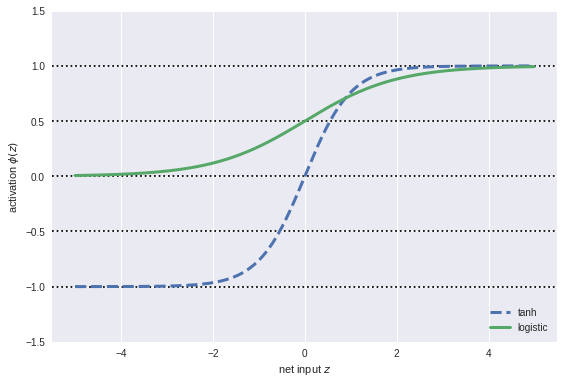

In [41]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='tanh')
plt.plot(z, log_act, linewidth=3, label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [42]:
tanh_act = np.tanh(z)
tanh_act

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [43]:
from scipy.special import expit
log_act = expit(z)
log_act

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])